In [1]:
from generators import *
import matplotlib.pyplot as plt
import sys
print(sys.version)
import networkx as nx
print(nx.__version__)

from scipy import stats # to do regression for the estimation of the exponent
from scipy.stats import poisson

from network_utils import *

3.9.6 (tags/v3.9.6:db3ff76, Jun 28 2021, 15:26:21) [MSC v.1929 64 bit (AMD64)]
2.7.1


In [2]:
def descriptors(G):
    print("Number of nodes: {}".format(G.number_of_nodes()))
    #G.nodes()

    print("Number of edges: {}".format(G.number_of_edges()))
    #G.edges()

    degrees_values = [val for key,val in G.degree()] # degree for each node
    #degrees_values

    print("Min degree: {}".format(np.min(degrees_values)))
    print("Max degree: {}".format(np.max(degrees_values)))
    print("Avg degree: {}".format(round(np.mean(degrees_values), 4)))
    #G = nx.Graph(G)

    print("Clustering: {}".format(round(nx.average_clustering(G), 4)))
    print("Assortativity: {}".format(round(nx.degree_assortativity_coefficient(G), 4)))
    if nx.is_connected(G):
        print("Avg path length: {}".format(round(nx.average_shortest_path_length(G), 4)))
        print("Diameter: {}".format(nx.diameter(G)))

## Small networks analysis

Let's observe one generation of an ER network:

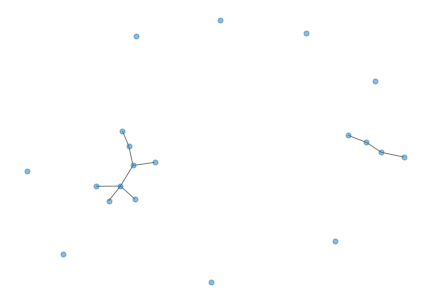

In [3]:
g1 = ErdosRenyi(20, 10)
nx.draw(g1, alpha=.5, node_size=25)

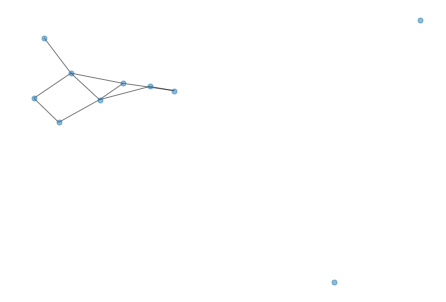

In [4]:
g1 = ErdosRenyi(10, 10)
nx.draw(g1, alpha=.5, node_size=25)
plt.savefig("images/ER_N10_K10.png")
nx.write_pajek(g1, "nets/ER_N10_K10.net")

We can see that we have, as expected, 20 nodes and 10 edges. Because the assignement requires us to use specific values of the mean degree \<K\>, we will use the following formula to make the conversion:
    K = \<K\>N/2.
 

In [5]:
KfromMeanK = lambda N, mK: int(N*mK/2) 

In [6]:
# Networks generation
graphs = []
N = 50
K_list = [3, 6, 9]
for K in K_list:
    print("N K:", N, K)
    graphs.append(ErdosRenyi(N, int(N*K/2))) # Formula given above

N K: 50 3
N K: 50 6
N K: 50 9


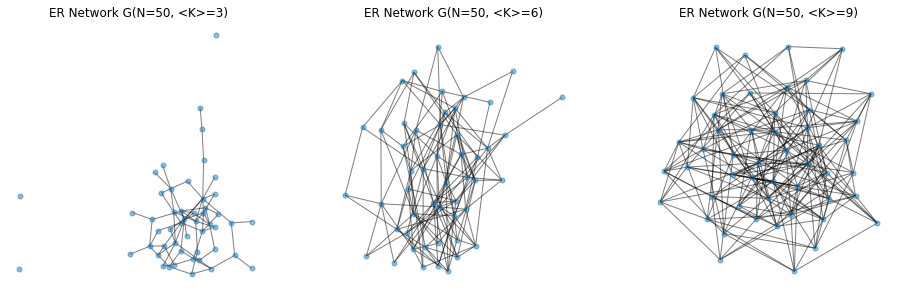

In [7]:
fig, axs = plt.subplots(1, len(K_list), figsize=(16, 5))
for i, g in enumerate(graphs):
    #plt.subplot(1, 3, i+1)
    axs[i].title.set_text(f"ER Network G(N={N}, <K>={K_list[i]})")
    nx.draw(g, alpha=0.5, node_size=25, ax=axs[i])
    nx.write_pajek(graphs[i], f"nets/ER_N{N}_mK{K_list[i]}.net")

fig.savefig(f"images/ER_N{N}_mK{'-'.join(str(K) for K in K_list)}.png")

We can see the impact of the K variable: the more K is high, the more dense the network is.

In [8]:
for g in graphs:
    print(round(np.mean([val for key,val in g.degree()]), 2))

3.0
6.0
9.0


Correct average degree.

# Large network analysis

In [13]:
er_1k_5, er_10k_5 = ErdosRenyi(1e3, KfromMeanK(1e3, 5)), ErdosRenyi(1e4, KfromMeanK(1e4, 5))

1000 2500


C:\Users\33604\Documents\fib_upc\cn\Assignements\A2-models\network-models-generators\network_utils.py:88: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(w, z, 'k-', color='#7f7f7f')


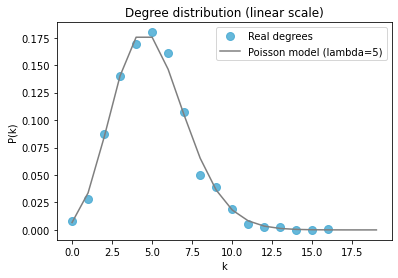

In [11]:
print(er_1k_5.number_of_nodes(), er_1k_5.number_of_edges())
plot_distrib_lin(graph=er_1k_5, fit_poisson = True, colour='#40a6d1', alpha=.8, expct_lo=0, expct_hi=20, fit_lambda=5)
plt.savefig("images/ER_DD_1k_5.png")

We can observe that the degree distribution can be associated to a Poisson distribution. We were expecting this result as we parametrized the network with <k>=5.
Although the Poisson model seem really close to the experimental values, we confirm that it is a model, as can be seen in `network_utils.plot_distrib_lin` (network_utils is a module that we created with useful functions for this assignement, can be found in `network_utils.py`).

C:\Users\33604\Documents\fib_upc\cn\Assignements\A2-models\network-models-generators\network_utils.py:88: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(w, z, 'k-', color='#7f7f7f')


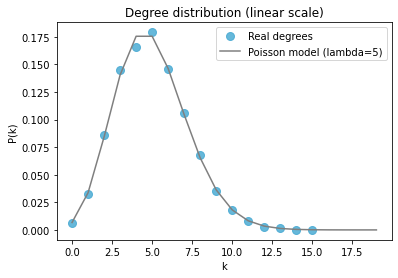

In [14]:
plot_distrib_lin(graph=er_10k_5, fit_poisson = True, colour='#40a6d1', alpha=.8, expct_lo=0, expct_hi=20, fit_lambda=5)
plt.savefig("images/ER_DD_10k_5.png")

## Parameter estimation

For a Poisson distribution, we know that the maximum likehood estimator (noted MLE below) is the simple artihmetic mean of the observations.

In [ ]:
# Poisson MLE
compute_poisson_MLE = lambda graph : np.mean([val for key,val in graph.degree()])
    
print(f"N=1k, Theoretical: 5, Estimated: {compute_poisson_MLE(er_1k_5)}")
print(f"N=10k, Theoretical: 10, Estimated: {compute_poisson_MLE(er_10k_5)}")


